<a href="https://colab.research.google.com/github/YeomSuWoong/SOCAR-AI-BOOT-CAMP/blob/main/First_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [18]:
file = open('/content/drive/MyDrive/Colab Notebooks/data/regression_data.txt', 'r')
text = file.readlines()
file.close()

x_data = []
y_data = []

for idx,s in enumerate(text):
  if idx%10 == 0:
    data = s.split()
    x_data.append(float(data[0]))
    y_data.append(float(data[1]))

x_data = np.array(x_data, dtype = np.float32)
y_data = np.array(y_data, dtype = np.float32)

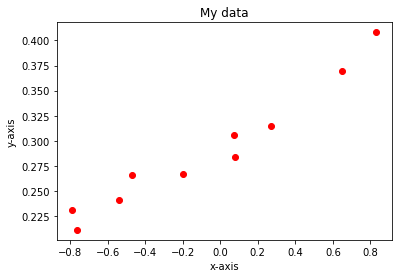

In [21]:
#%matplotlib inline

plt.figure(1)
plt.plot(x_data, y_data, 'ro')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('My data')

plt.show()

In [22]:
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1

In [23]:
model = nn.Linear(input_size, output_size)

In [26]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [31]:
# Train the model with data about size 10
for epoch in range(num_epochs):
  inputs = torch.from_numpy(x_data)
  targets = torch.from_numpy(y_data)

  outputs = model(inputs)
  loss = criterion(outputs, targets)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch+1) % 5 == 0:
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/100], Loss: 0.0002
Epoch [10/100], Loss: 0.0002
Epoch [15/100], Loss: 0.0002
Epoch [20/100], Loss: 0.0002
Epoch [25/100], Loss: 0.0002
Epoch [30/100], Loss: 0.0002
Epoch [35/100], Loss: 0.0002
Epoch [40/100], Loss: 0.0002
Epoch [45/100], Loss: 0.0002
Epoch [50/100], Loss: 0.0002
Epoch [55/100], Loss: 0.0002
Epoch [60/100], Loss: 0.0002
Epoch [65/100], Loss: 0.0002
Epoch [70/100], Loss: 0.0002
Epoch [75/100], Loss: 0.0002
Epoch [80/100], Loss: 0.0002
Epoch [85/100], Loss: 0.0002
Epoch [90/100], Loss: 0.0002
Epoch [95/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0002


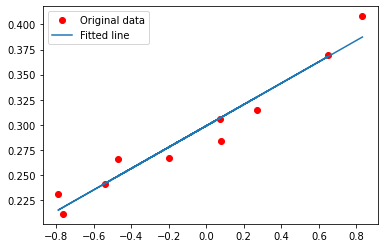

In [32]:
predicted = model(torch.from_numpy(x_data)).detach().numpy()
plt.plot(x_data, y_data, 'ro', label = 'Original data')
plt.plot(x_data, predicted, label = 'Fitted line')
plt.legend()
plt.show()